In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle

from math import sin, cos, radians, degrees

np.set_printoptions(suppress=True, precision=5)


In [33]:
def to_unit_vector(v):
    h = np.zeros(shape=(v.shape[0], 2))
    h[:, 0] = np.cos(np.radians(v))
    h[:, 1] = np.sin(np.radians(v))
    return h

def transform(trajectory, theta, t = np.zeros(2,)):
    R = np.asarray([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    trajectory = trajectory - t
    # print(trajectory.shape, trajectory, t.shape, t)
    return trajectory @ R

In [56]:
color_map = {0: 'green', 1: 'blue'}


airport = np.array([[2, 1], [2, 3], [2, 5], [2, 7], [2, 5], [4, 6], [6, 6]])
airport_ids = [0, 0, 0, 0, 1, 1, 1]

agent_1 = np.array([[2.5, 7.5]])
agent_1_heading = np.array([-90])
agent_2 = np.array([[4.5, 6.5]])
agent_2_heading = np.array([200])

agent_to_agent = np.array([agent_1[0], agent_2[0]])
agent1_to_map = np.array([agent_1[0], airport[3]])
agent2_to_map = np.array([agent_2[0], airport[5]])


In [57]:
theta = radians(agent_1_heading[0] -90)
airport_wrt_agent1 = transform(airport, theta, agent_1[0])
agent1_wrt_agent1 = transform(agent_1, theta, agent_1[0])
agent2_wrt_agent1 = transform(agent_2, theta, agent_1[0])
agent_to_agent_wrt_agent1 = transform(agent_to_agent, theta, agent_1[0])
agent1_to_map_wrt_agent1 = transform(agent1_to_map, theta, agent_1[0])
agent2_to_map_wrt_agent1 = transform(agent2_to_map, theta, agent_1[0])

In [58]:
theta = radians(agent_2_heading[0] -90)
airport_wrt_agent2 = transform(airport, theta, agent_2[0])
agent1_wrt_agent2 = transform(agent_1, theta, agent_2[0])
agent2_wrt_agent2 = transform(agent_2, theta, agent_2[0])
agent_to_agent_wrt_agent2 = transform(agent_to_agent, theta, agent_2[0])
agent1_to_map_wrt_agent2 = transform(agent1_to_map, theta, agent_2[0])
agent2_to_map_wrt_agent2 = transform(agent2_to_map, theta, agent_2[0])

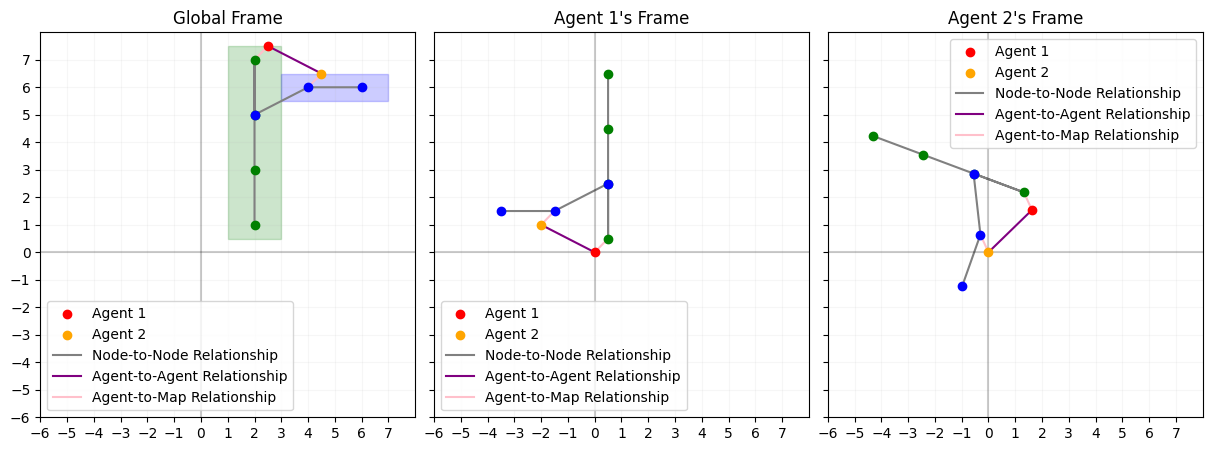

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(15, 5))

def plot_scene(ax, ax_id, scene, a1, a2, aa, a1m, a2m, title):
    ax[ax_id].scatter(a1[0, 0], a1[0, 1], color='red', label='Agent 1', zorder=10)
    ax[ax_id].scatter(a2[0, 0], a2[0, 1], color='orange', label='Agent 2', zorder=10)
    for i in range(scene.shape[0]):
        ax[ax_id].scatter(scene[i, 0], scene[i, 1], color=color_map[airport_ids[i]], zorder=5)
    ax[ax_id].plot(scene[:, 0], scene[:, 1], color='gray', label='Node-to-Node Relationship')
    ax[ax_id].set_title('Global Frame')
    ax[ax_id].plot(aa[:, 0], aa[:, 1], color='purple', label='Agent-to-Agent Relationship')
    ax[ax_id].plot(a1m[:, 0], a1m[:, 1], color='pink', label='Agent-to-Map Relationship')
    ax[ax_id].plot(a2m[:, 0], a2m[:, 1], color='pink')
    ax[ax_id].legend()
    ax[ax_id].set_title(title)


ax[0].add_patch(Rectangle((1, 0.5), 2, 7, color='green', alpha=0.2))
ax[0].add_patch(Rectangle((3, 5.5), 4, 1, color='blue', alpha=0.2))

plot_scene(ax, 0, airport, agent_1, agent_2, agent_to_agent, agent1_to_map, agent2_to_map, 'Global Frame')
plot_scene(
    ax, 1, airport_wrt_agent1, agent1_wrt_agent1, agent2_wrt_agent1, agent_to_agent_wrt_agent1, 
    agent1_to_map_wrt_agent1, agent2_to_map_wrt_agent1, "Agent 1's Frame")
plot_scene(
    ax, 2, airport_wrt_agent2, agent1_wrt_agent2, agent2_wrt_agent2, agent_to_agent_wrt_agent2, 
    agent1_to_map_wrt_agent2, agent2_to_map_wrt_agent2, "Agent 2's Frame")

for a in ax.reshape(-1):
    a.grid(alpha=0.1)
    a.set_xlim(-6, 8)
    a.set_ylim(-6, 8)
    a.set_xticks(np.arange(-6, 8, 1))
    a.set_yticks(np.arange(-6, 8, 1))
    # # a.spines['bottom'].set_position('zero')
    a.axhline(0, color='black', alpha=0.2)
    a.axvline(0, color='black', alpha=0.2)

plt.subplots_adjust(wspace=0.05, hspace=0)

In [38]:
# Transform agent 1
theta_1 = radians(thetas_1[0] - 90)
trajectory_11 = transform(trajectory_1, theta_1, trajectory_1[0])
heading_11 = transform(headings_1, theta_1)

theta_2 = radians(thetas_2[0] - 90)
trajectory_12 = transform(trajectory_1, theta_2, trajectory_2[0])
heading_12 = transform(headings_1, theta_2)

NameError: name 'thetas_1' is not defined

In [ ]:
# Transform agent 2
theta_1 = radians(thetas_1[0] - 90)
trajectory_21 = transform(trajectory_2, theta_1, trajectory_1[0])
heading_21 = transform(headings_2, theta_1)

theta_2 = radians(thetas_2[0] - 90)
trajectory_22 = transform(trajectory_2, theta_2, trajectory_2[0])
heading_22 = transform(headings_2, theta_2)

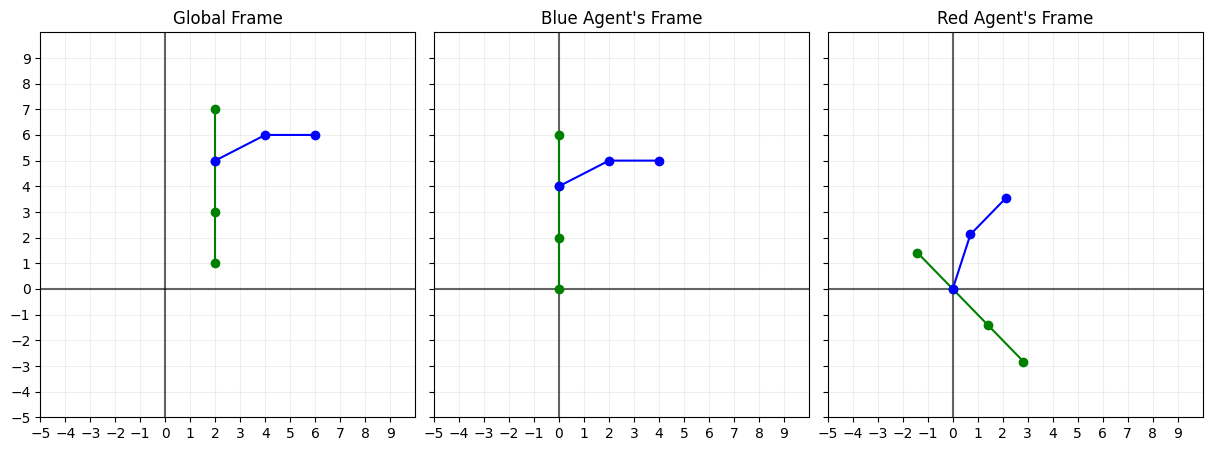

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(15, 5))

for a in ax.reshape(-1):
    a.grid(alpha=0.2)
    a.set_xlim(-5, 10)
    a.set_ylim(-5, 10)
    a.set_xticks(np.arange(-5, 10, 1))
    a.set_yticks(np.arange(-5, 10, 1))
    # a.spines['bottom'].set_position('zero')
    a.axhline(0, color='black', alpha=0.6)
    a.axvline(0, color='black', alpha=0.6)

ax[0].plot(trajectory_1[:, 0], trajectory_1[:, 1], color='green', marker='o')
ax[0].plot(trajectory_2[:, 0], trajectory_2[:, 1], color='blue', marker='o')
ax[0].set_title('Global Frame')

ax[1].plot(trajectory_11[:, 0], trajectory_11[:, 1], color='green', marker='o')
ax[1].plot(trajectory_21[:, 0], trajectory_21[:, 1], color='blue', marker='o')
ax[1].set_title("Blue Agent's Frame")

ax[2].plot(trajectory_12[:, 0], trajectory_12[:, 1], color='green', marker='o')
ax[2].plot(trajectory_22[:, 0], trajectory_22[:, 1], color='blue', marker='o')
ax[2].set_title("Red Agent's Frame")

plt.subplots_adjust(wspace=0.05, hspace=0)

# Viepoint Invariance using Pair-Pose

In [ ]:
def pairpose(trajectory, heading):
    cj, hj = trajectory[-1], heading[-1]
    ci, hi = trajectory[:-1], heading[:-1]
    vij = ci - cj
    dij = np.linalg.norm(vij, axis=1)
    sa = np.cross(hi, hj)
    ca = np.dot(hi, hj)
    sb = np.cross(vij, hj) / (dij * np.linalg.norm(hj))
    cb = np.dot(vij, hj) / (dij * np.linalg.norm(hj))
    return dij, sa, ca, sb, cb

In [ ]:
print(f"Blue agent pair-pose in global frame")
pairpose(trajectory_1, headings_1)

Blue agent pair-pose in global frame


(array([6., 4., 2.]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([0., 0., 0.]),
 array([-1., -1., -1.]))

In [ ]:
trajectory_1_flipped = np.flip(trajectory_1, axis=0)
headings_1_flipped = -np.flip(headings_1, axis=0)
pairpose(trajectory_1_flipped, headings_1_flipped)

(array([6., 4., 2.]),
 array([0.     , 0.     , 0.70711, 0.70711]),
 array([1.     , 1.     , 0.70711, 0.70711]),
 array([0., 0., 0.]),
 array([-1., -1., -1.]))

In [ ]:
print(f"Blue agent pair-pose in blue agent's frame")
pairpose(trajectory_11, heading_11)

Blue agent pair-pose in blue agent's frame


(array([6., 4., 2.]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([0., 0., 0.]),
 array([-1., -1., -1.]))

In [ ]:
print(f"Blue agent pair-pose in red agent's frame")
pairpose(trajectory_12, heading_12)

Blue agent pair-pose in red agent's frame


(array([6., 4., 2.]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([0., 0., 0.]),
 array([-1., -1., -1.]))

In [ ]:
print(f"Red agent pair-pose in global frame")
pairpose(trajectory_2, headings_2)

Red agent pair-pose in global frame


(array([4.12311, 2.     ]),
 array([-1.     , -1.     , -0.70711,  0.     ]),
 array([0.     , 0.     , 0.70711, 1.     ]),
 array([0.85749, 0.70711]),
 array([-0.5145 , -0.70711]))

In [ ]:
print(f"Red agent pair-pose in blue agent's frame")
pairpose(trajectory_21, heading_21)

Red agent pair-pose in blue agent's frame


(array([4.12311, 2.     ]),
 array([-1.     , -1.     , -0.70711,  0.     ]),
 array([0.     , 0.     , 0.70711, 1.     ]),
 array([0.85749, 0.70711]),
 array([-0.5145 , -0.70711]))

In [ ]:
print(f"Red agent pair-pose in red agent's frame")
pairpose(trajectory_22, heading_22)

Red agent pair-pose in red agent's frame


(array([4.12311, 2.     ]),
 array([-1.     , -1.     , -0.70711,  0.     ]),
 array([0.     , 0.     , 0.70711, 1.     ]),
 array([0.85749, 0.70711]),
 array([-0.5145 , -0.70711]))

# Sinusoidal Encoding

In [ ]:
print(f"Blue agent pair-pose in global frame")
dij, sa, ca, sb, cb = pairpose(trajectory_1, headings_1)
dij, sa, ca, sb, cb

Blue agent pair-pose in global frame


(array([6., 4., 2.]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([0., 0., 0.]),
 array([-1., -1., -1.]))

In [ ]:
frequencies = [1, 5, 10, 15, 20]
for n in frequencies:
    pn = np.sin(dij * np.exp(4 * n / len(frequencies)))

    rn = np.cos(dij * np.exp(4 * n / len(frequencies)))
    print(pn, rn)

[ 0.70815  0.49915 -0.96605] [ 0.70606 -0.86652 -0.25834]
[ 0.75997 -0.99865  0.68852] [ 0.64996  0.05189 -0.72522]
[-0.61386 -0.99656 -0.73582] [-0.78941 -0.08287  0.67717]
[ 0.69638 -0.49128  0.25397] [-0.71768  0.871   -0.96721]
[ 0.09287 -0.83338 -0.88111] [-0.99568 -0.5527   0.47292]


In [ ]:
ci = np.array([0,0])
hi = to_unit_vector(np.array([90]))

cj = np.array([3,3])
hj = to_unit_vector(np.array([45]))

hi, hj

(array([[0., 1.]]), array([[0.70711, 0.70711]]))

In [ ]:
vij = ci - cj
saij = np.cross(hi, hj)
caij = np.dot(hi, hj.T)
sbij = np.cross(vij, hj) / np.linalg.norm(vij)
# cbij = np.dot(vij, hj) / np.linalg.norm(vij)
vij, saij, caij, sbij, cbij

NameError: name 'cbij' is not defined

In [ ]:
vji = cj - ci
saji = -np.cross(hj, hi)
caji = np.dot(hj, hi.T)

sbji = -np.cross(vji, hi) / (np.linalg.norm(vji) * np.linalg.norm(hi))
cbji =  np.dot(vji, hi.T) / (np.linalg.norm(vji) * np.linalg.norm(hi))
vji, saji, caji, sbji, cbji

(array([3, 3]),
 array([-0.70711]),
 array([[0.70711]]),
 array([-0.70711]),
 array([0.70711]))